In [0]:
import numpy as np
import random as rd
import matplotlib.pylab as plt
from matplotlib import cm


data    = np.genfromtxt("/content/drive/My Drive/Colab Notebooks/assignment-02/data-nonlinear.txt", delimiter=',')

x       = data[:, 0]
y       = data[:, 1]
label   = data[:, 2]


x_label0    = x[label == 0]
y_label0    = y[label == 0]

x_label1    = x[label == 1]
y_label1    = y[label == 1]

lb_0 = np.column_stack([x_label0, y_label0, np.zeros(len(x_label0))])
lb_1 = np.column_stack([x_label1, y_label1, np.ones(len(x_label1))])


train_set = np.vstack([lb_0,lb_1])


In [0]:
functions =[lambda x,y: 1, lambda x,y: x, lambda x,y: y, lambda x,y: x*y,\
                lambda x,y: x**2, lambda x,y: y**2, lambda x,y: y**4, lambda x,y: y**4, lambda x,y: y**2 * x**2]

def f(data):
    result = []
    for func in functions:
        result.append(list(map(func, data[0,:], data[1,:])))
    return np.array(result)

def partialDiff(j):
    return list(map(functions[j], train_set[:,0], train_set[:,1]))


In [0]:
alpha = 0.0006
m = len(train_set)

def z(th, x):
    return np.matmul(th,f(x))
def h(th, x):
    return 1 / (1 +np.exp(-z(th, x)))
def J(th, data): 
    return (1/(m)) * np.sum(                                                   \
        - data[:,2] * np.log(h(th,np.transpose(data[:,0:2])))                  \
        - (1-data[:,2]) * np.log(1 - h(th,np.transpose(data[:,0:2])))          \
        )
def accuracy():
    return np.sum((np.equal(data[:,2], 
    np.around(h(g_th,f(np.transpose(train_set[:,0:2]))))))) / data[:,2].shape[0]


def th_cal(th):
    result = []
    diff = (h(th, np.transpose(train_set[:,0:2])) - train_set[:,2])
    for j in range(len(th)):
        result.append( th[j]-(alpha * (1/m) * np.sum(  diff * partialDiff(j) )) )
    return np.array(result)


In [172]:
g_th = np.array([2,1,1,2,1,1,2,1,1])
J_log_train = [J(g_th, train_set)]
th_log = [g_th]
accuracy_log = [accuracy()]

# import sys
e = 5*10 ** (-14)

from tqdm.notebook import tqdm
for i in tqdm(range(6000)):
    g_th = th_cal(g_th)
    J_log_train.append(J(g_th, train_set))
    th_log.append(g_th)
    accuracy_log.append(accuracy())
    if(i==100000):
        alpha = 0.0003
    elif(i == 500000):
        alpha = 0.00001
    elif(i == 1000000):
        alpha = 0.000003
    elif(i == 1500000):
        alpha = 0.000001
    if abs(J(g_th, train_set) - J_log_train[-2]) <=e and np.sum (g_th -th_log[-2]) <= 4*e:
        break


In [173]:
print(J_log_train[-2])

1.2011509709003703




---




##### 3. Plot the training error [3pt]
- plot the training error $J(\theta_0, \theta_1, \theta_2)$ at every iteration of gradient descent until convergence (in blue color)



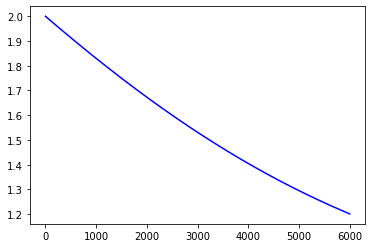

In [174]:
plt.plot(J_log_train,c='blue')
plt.show()

##### 4. Plot the training accuracy [3pt]
- plot the training accuracy at every iteration of gradient descent until convergence (in red color)



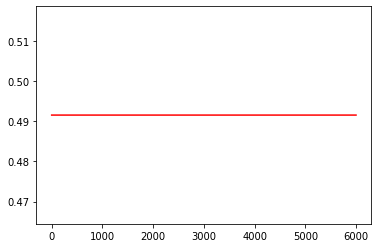

In [175]:
plt.plot(accuracy_log,c='red')
plt.show()

##### 5. Write down the final training accuracy [2pt]
- the final training accuracy at convergence


In [176]:
accuracy()

0.4915254237288136


##### 6. Plot the optimal classifier superimposed on the training data [5pt]
- plot the boundary of the optimal classifier at convergence (in green color)
- the boundary of the classifier is defined by $\{ (x, y) \mid \sigma(g(x, y ; \theta)) = 0.5 \} = \{ (x, y) \mid g(x, y ; \theta) = 0 \}$
- plot the training data points $(x, y)$ with their labels $l$ in colors superimposed on the illustration of the classifier (blue for label 0 and red for label 1)
- you can use `contour` function in python3


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 0.98633708 0.98635193 0.98636695 0.98638216 0.98639754 0.9864131
 0.98642883 0.98644475 0.98646083 0.98647709 0.98649352 0.98651013
 0.98652691 0.98654386 0.98656098 0.98657827 0.98659573 0.98661336
 0.98663116 0.98664912 0.98666725 0.98668555 0.98670401 0.98672264
 0.98674143 0.98676038 0.9867795  0.98679877 0.98681821 0.98683781
 0.98685756 0.98687748 0.98689755 0.98691777 0.98693816 0.9869587
 0.98697939 0.98700023 0.98702123 0.98704238 0.98706368 0.98708513
 0.98710673 0.98712848 0.98715037 0.98717241 0.9871946  0.98721693
 0.98723941 0.98726203 0.98728479 0.98730769 0.98733073 0.98735391
 0.98737723 0.98740069 0.98742429 0.98744802 0.98747188 0.98749588
 0.98752001 0.98754428 0.98756867 0.9875932  0.98761785 0.98764263
 0.98766754 0.98769258 0.98771774 0.98774303 0.98776844 0.98779397
 0.98781962 0.9878454  0.98787129 0.9878973  0.98792343 0.98794968
 0.98797604 0.98800251 0.9880291  0.98805581 0.98808262 0.98810954
 0.98813658 0.98816372 0.988

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: No contour levels were found within the data range.
  if __name__ == '__main__':


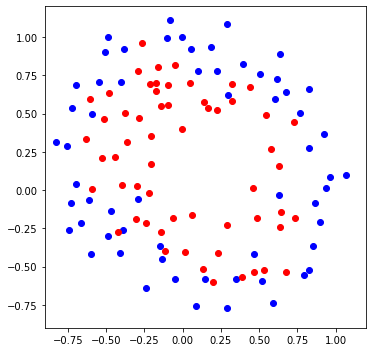

In [181]:
X, Y = np.meshgrid(np.linspace(-0.9, 1.2, 1000), np.linspace(-0.9, 1.2, 1000))


Z = np.array([  np.around(   h(g_th, np.array([x,y]) )   ) for x,y in zip(X,Y)  ])
for x,y in zip(X,Y):
    print(h(g_th, np.array([x,y])))

plt.figure(figsize=(12, 5))
plt.contour(X, Y, Z, cmap='Greens',levels = np.linspace(Z.reshape(-1, 1).min(), Z.reshape(-1, 1).max(), 50))

plt.scatter(x_label0, y_label0, c='b')
plt.scatter(x_label1, y_label1, c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')


plt.show()



#로지스틱 회귀 실습

##### 1. Plot the training data [2pt]
- plot the training data points $(x, y)$ with their labels $l$ in colors (blue for label 0 and red for label 1)




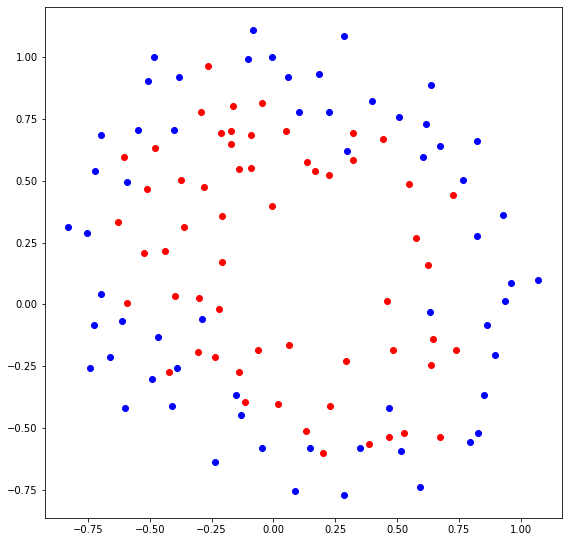

In [160]:
plt.figure(figsize=(8, 8))
plt.scatter(x_label0, y_label0, c='b')
plt.scatter(x_label1, y_label1, c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


##### 2. Write down the high dimensional function $g(x, y; \theta)$ [2pt]
- write down the equation for the non-linear function $g(x, y; \theta)$ used for the classifier in LaTeX format  

$$
let F = (f_0(x,y), f_1(x,y), f_2(x,y), f_3(x,y),\dots) \\
f_0(x,y) = 1 \\
f_1(x,y) = x \\
f_2(x,y) = y \\
f_3(x,y) = xy \\
f_4(x,y) = x^2 \\
f_5(x,y) = y^2 \\
f_6(x,y) = x^4 \\
f_7(x,y) = y^4 \\
f_8(x,y) = x^2y^2 \\
f_9(x,y) = ? \\
f_{10}(x,y) = ? \\
f_{11}(x,y) = ? \\
f_{12}(x,y) = ? \\
f_{13}(x,y) = ? \\
f_{14}(x,y) = ? \\
f_{15}(x,y) = ? \\
g(x, y ; \theta) = \theta_{0} f_{0}(x, y) + \theta_{1} f_{1}(x, y) + \cdots + \theta_{k-1} f_{k-1}(x, y) = \theta \cdot F
$$
